In [ ]:
!python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import pandas_datareader as pdr

In [15]:
df=pd.read_csv("airline_passengers.csv")

In [16]:
# df=df.reset_index()
df.rename(columns={'Month': 'ds', 'Thousands of Passengers': 'y'}, inplace=True)

In [17]:
df

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [18]:
df.isna().sum()

ds    0
y     0
dtype: int64

In [19]:
df.describe()

,y
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [20]:
df.describe

<bound method NDFrame.describe of           ds    y
0    1949-01  112
1    1949-02  118
2    1949-03  132
3    1949-04  129
4    1949-05  121
..       ...  ...
139  1960-08  606
140  1960-09  508
141  1960-10  461
142  1960-11  390
143  1960-12  432

[144 rows x 2 columns]>

In [21]:
df.shape

(144, 2)

In [22]:
df=df.dropna()

In [23]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
mean_imputer.fit_transform((df['y'].values).reshape(-1,1))

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

<Axes: xlabel='y'>

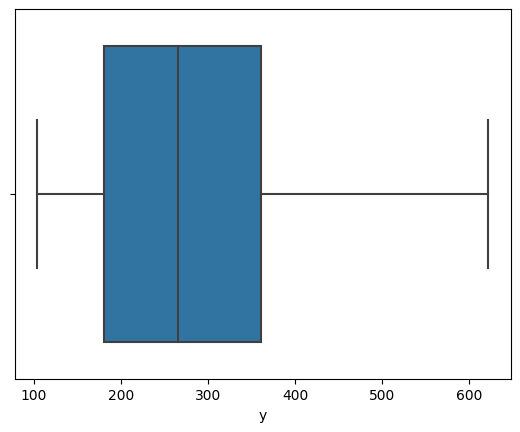

In [24]:
import seaborn as sns
sns.boxplot(x=df['y'])

In [25]:
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3-q1
# print((df['y']<(q1-1.5*iqr)) | (df['y']>(q3+1.5*iqr)))

In [26]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1u2kijnt/9xr3q2_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1u2kijnt/p5k0zqxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99811', 'data', 'file=/tmp/tmp1u2kijnt/9xr3q2_6.json', 'init=/tmp/tmp1u2kijnt/p5k0zqxl.json', 'output', 'file=/tmp/tmp1u2kijnt/prophet_modelohr9h63d/prophet_model-20230714084151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:41:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:41:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [28]:
future_dates=model.make_future_dataframe(periods=30)

In [29]:
future_dates.tail()

,ds
169,1960-12-27
170,1960-12-28
171,1960-12-29
172,1960-12-30
173,1960-12-31


In [30]:
prediction = model.predict(future_dates)

In [31]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
169,1960-12-27,487.155516,410.885079,466.551189,487.155516,487.155516,-47.629272,-47.629272,-47.629272,-47.629272,-47.629272,-47.629272,0.0,0.0,0.0,439.526244
170,1960-12-28,487.256349,416.078385,472.016813,487.256349,487.256349,-41.712913,-41.712913,-41.712913,-41.712913,-41.712913,-41.712913,0.0,0.0,0.0,445.543436
171,1960-12-29,487.357183,422.901472,479.719442,487.357183,487.357183,-36.011818,-36.011818,-36.011818,-36.011818,-36.011818,-36.011818,0.0,0.0,0.0,451.345365
172,1960-12-30,487.458017,427.447781,484.824085,487.458017,487.458017,-30.650048,-30.650048,-30.650048,-30.650048,-30.650048,-30.650048,0.0,0.0,0.0,456.807968
173,1960-12-31,487.558850,434.851591,489.285979,487.558850,487.558850,-25.742749,-25.742749,-25.742749,-25.742749,-25.742749,-25.742749,0.0,0.0,0.0,461.816101


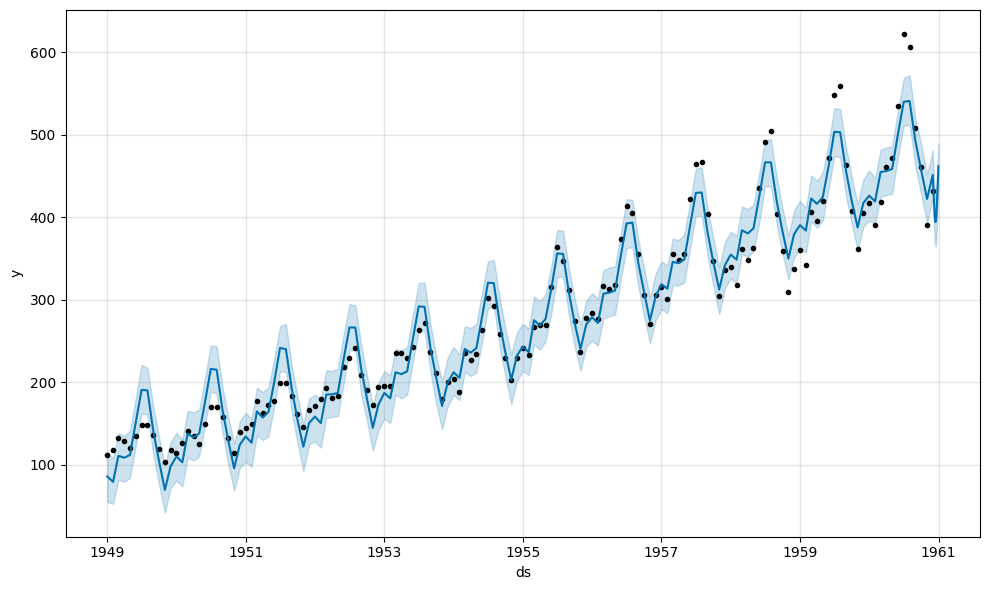

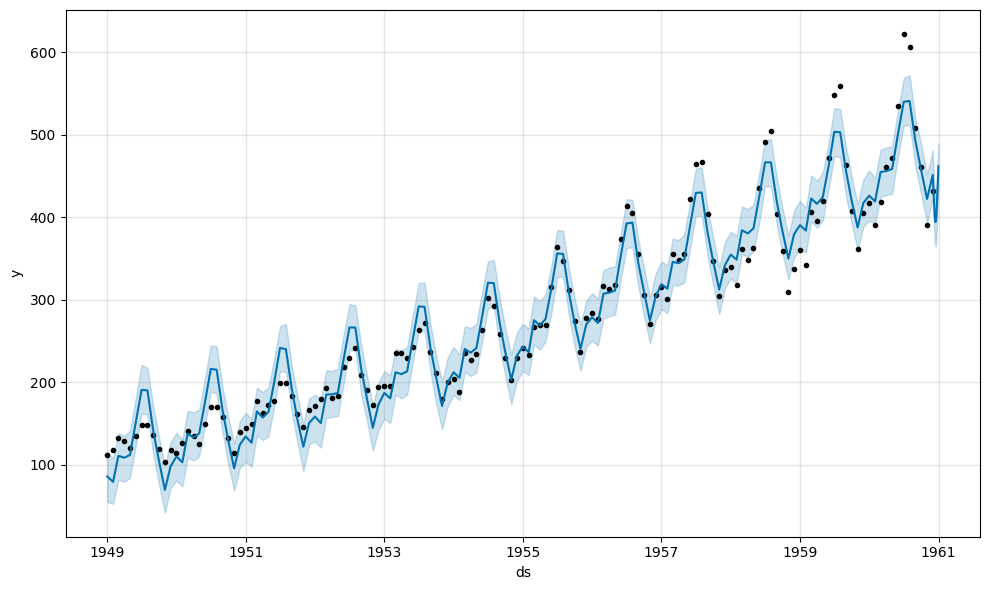

In [32]:
model.plot(prediction)

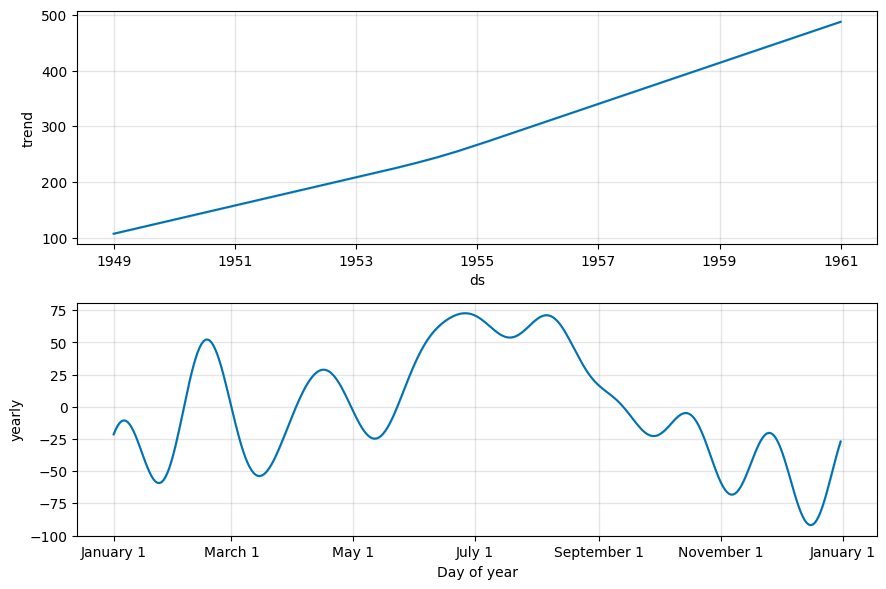

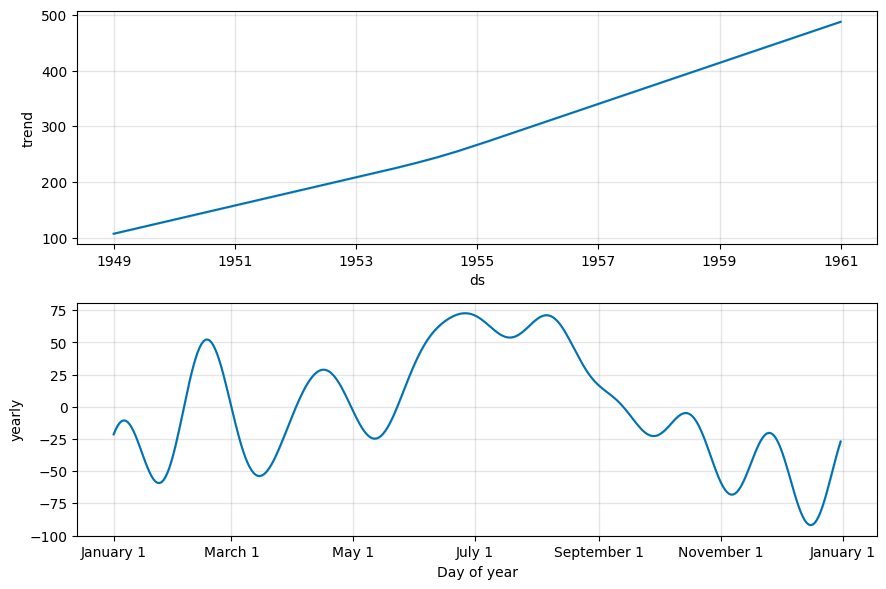

In [33]:
model.plot_components(prediction)

In [34]:
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
